In [1]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
import json
import pprint
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset

import nltk
from nltk import corpus
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = corpus.stopwords.words('english')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
dataset = load_dataset("qiaojin/PubMedQA", "pqa_artificial")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/233M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/211269 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['pubid', 'question', 'context', 'long_answer', 'final_decision'],
        num_rows: 211269
    })
})

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['pubid', 'question', 'context', 'long_answer', 'final_decision'],
        num_rows: 211269
    })
})

In [5]:
dataset['train']

Dataset({
    features: ['pubid', 'question', 'context', 'long_answer', 'final_decision'],
    num_rows: 211269
})

In [8]:
dataset['train']['pubid'][0]

25429730

In [9]:
dataset['train']['question'][0]

'Are group 2 innate lymphoid cells ( ILC2s ) increased in chronic rhinosinusitis with nasal polyps or eosinophilia?'

In [10]:
dataset['train']['context'][0]

{'contexts': ['Chronic rhinosinusitis (CRS) is a heterogeneous disease with an uncertain pathogenesis. Group 2 innate lymphoid cells (ILC2s) represent a recently discovered cell population which has been implicated in driving Th2 inflammation in CRS; however, their relationship with clinical disease characteristics has yet to be investigated.',
  'The aim of this study was to identify ILC2s in sinus mucosa in patients with CRS and controls and compare ILC2s across characteristics of disease.',
  'A cross-sectional study of patients with CRS undergoing endoscopic sinus surgery was conducted. Sinus mucosal biopsies were obtained during surgery and control tissue from patients undergoing pituitary tumour resection through transphenoidal approach. ILC2s were identified as CD45(+) Lin(-) CD127(+) CD4(-) CD8(-) CRTH2(CD294)(+) CD161(+) cells in single cell suspensions through flow cytometry. ILC2 frequencies, measured as a percentage of CD45(+) cells, were compared across CRS phenotype, endo

In [12]:
dataset['train']['long_answer'][0]

'As ILC2s are elevated in patients with CRSwNP, they may drive nasal polyp formation in CRS. ILC2s are also linked with high tissue and blood eosinophilia and have a potential role in the activation and survival of eosinophils during the Th2 immune response. The association of innate lymphoid cells in CRS provides insights into its pathogenesis.'

In [13]:
dataset['train']['final_decision'][0]

'yes'

## Length of Contexts

In [14]:
questions = dataset['train']['question']
questions[0]

'Are group 2 innate lymphoid cells ( ILC2s ) increased in chronic rhinosinusitis with nasal polyps or eosinophilia?'

In [15]:
# Extract the 'context' column from the dataset
contexts = dataset['train']['context']
contexts[0]

{'contexts': ['Chronic rhinosinusitis (CRS) is a heterogeneous disease with an uncertain pathogenesis. Group 2 innate lymphoid cells (ILC2s) represent a recently discovered cell population which has been implicated in driving Th2 inflammation in CRS; however, their relationship with clinical disease characteristics has yet to be investigated.',
  'The aim of this study was to identify ILC2s in sinus mucosa in patients with CRS and controls and compare ILC2s across characteristics of disease.',
  'A cross-sectional study of patients with CRS undergoing endoscopic sinus surgery was conducted. Sinus mucosal biopsies were obtained during surgery and control tissue from patients undergoing pituitary tumour resection through transphenoidal approach. ILC2s were identified as CD45(+) Lin(-) CD127(+) CD4(-) CD8(-) CRTH2(CD294)(+) CD161(+) cells in single cell suspensions through flow cytometry. ILC2 frequencies, measured as a percentage of CD45(+) cells, were compared across CRS phenotype, endo

In [16]:
print(json.dumps(contexts[0], indent=4))

{
    "contexts": [
        "Chronic rhinosinusitis (CRS) is a heterogeneous disease with an uncertain pathogenesis. Group 2 innate lymphoid cells (ILC2s) represent a recently discovered cell population which has been implicated in driving Th2 inflammation in CRS; however, their relationship with clinical disease characteristics has yet to be investigated.",
        "The aim of this study was to identify ILC2s in sinus mucosa in patients with CRS and controls and compare ILC2s across characteristics of disease.",
        "A cross-sectional study of patients with CRS undergoing endoscopic sinus surgery was conducted. Sinus mucosal biopsies were obtained during surgery and control tissue from patients undergoing pituitary tumour resection through transphenoidal approach. ILC2s were identified as CD45(+) Lin(-) CD127(+) CD4(-) CD8(-) CRTH2(CD294)(+) CD161(+) cells in single cell suspensions through flow cytometry. ILC2 frequencies, measured as a percentage of CD45(+) cells, were compared 

In [18]:
contexts[0].keys()

dict_keys(['contexts', 'labels', 'meshes'])

In [19]:
context = contexts[0]

In [20]:
len(context['contexts']),len(context['labels']),len(context['meshes'])

(4, 4, 23)

In [ ]:
long_answers = dataset['train']['long_answer']
long_answers[0]

In [26]:
length = []
length.append(1)
length.append(2)
length

[1, 2]

In [28]:
length = []
for question in questions:
  length.append( len(question) )

(array([6.7000e+01, 1.6190e+03, 1.8929e+04, 5.8682e+04, 6.4673e+04,
        4.3562e+04, 1.5678e+04, 5.0380e+03, 1.8810e+03, 6.8600e+02,
        2.7700e+02, 1.0600e+02, 4.3000e+01, 1.4000e+01, 9.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 17.        ,  38.56666667,  60.13333333,  81.7       ,
        103.26666667, 124.83333333, 146.4       , 167.96666667,
        189.53333333, 211.1       , 232.66666667, 254.23333333,
        275.8       , 297.36666667, 318.93333333, 340.5       ,
        362.06666667, 383.63333333, 405.2       , 426.76666667,
        448.33333333, 469.9       , 491.46666667, 513.03333333,
        534.6       , 556.16666667, 577.73333333, 599.3       ,
        620.86666667, 642.43333333, 664.        ]),
 <BarContainer object of 30 artists>)

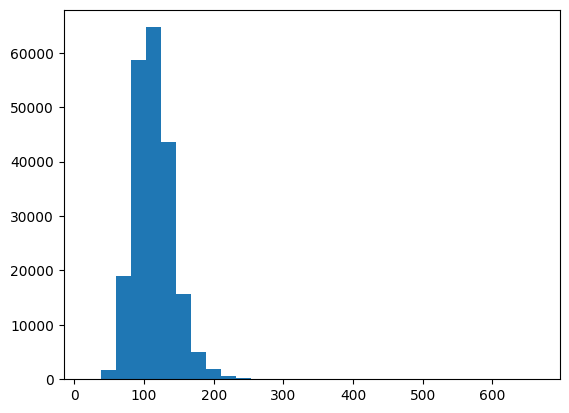

In [30]:
plt.hist(length, bins=30)

In [ ]:
final_decisions = dataset['train']['final_decision']
final_decisions[0]

## Word Frequency

In [31]:
data = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
counter = Counter(data)
print(counter)

Counter({'apple': 3, 'banana': 2, 'orange': 1})


In [34]:
', '.join(['a','sas','gf','as','yh'])

'a, sas, gf, as, yh'

In [35]:
'Hello world!'.split()

['Hello', 'world!']

In [36]:
# Function to calculate word frequency
def word_frequency(texts):
    words = ' '.join(texts).split()
    return Counter(words)

# Calculate word frequency for 'context' and 'question'
question_word_freq = word_frequency(questions)


''

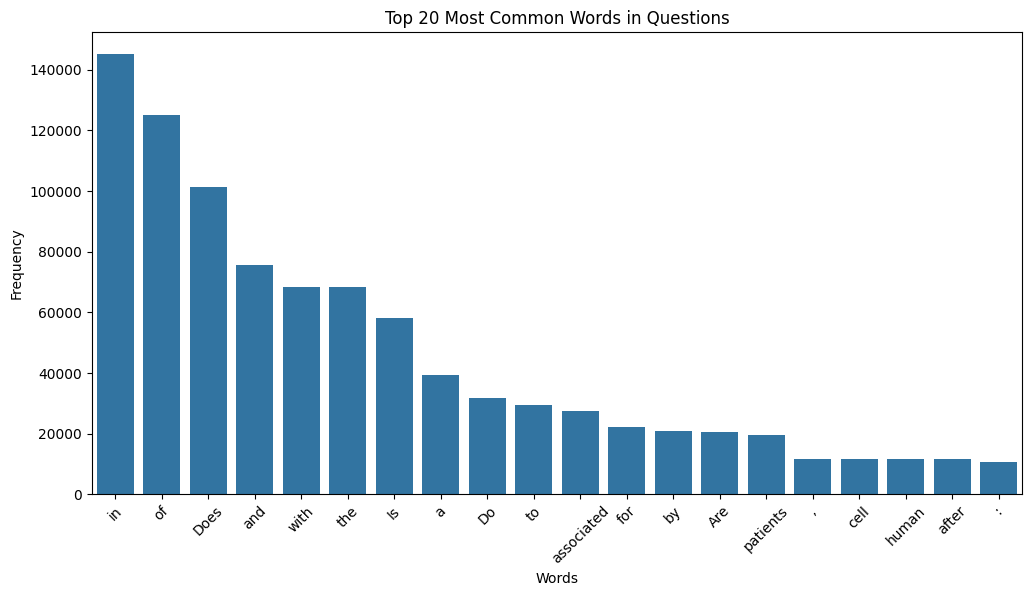

In [37]:
# Plot the top 20 most common words in 'question'
question_common_words = question_word_freq.most_common(20)
question_words, question_counts = zip(*question_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(question_words), y=list(question_counts))
plt.title('Top 20 Most Common Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
;

(-0.5, 799.5, 399.5, -0.5)

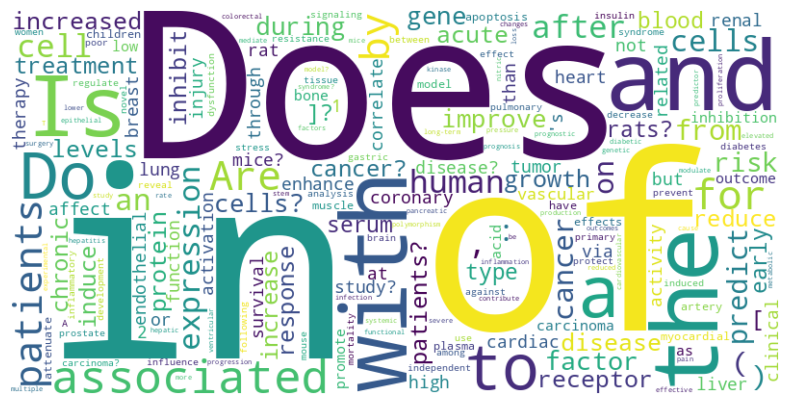

In [42]:
# Define WordCloud parameters: width, height, and background color
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud based on word frequencies
wordcloud.generate_from_frequencies(question_word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## N-grams

In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
text = "I love teaching NLP. N-grams are very useful in text analysis."
tokens = nltk.word_tokenize(text)
print(tokens)

['I', 'love', 'teaching', 'NLP', '.', 'N-grams', 'are', 'very', 'useful', 'in', 'text', 'analysis', '.']


In [46]:
[i for i in ngrams(tokens, 2)]

[('I', 'love'),
 ('love', 'teaching'),
 ('teaching', 'NLP'),
 ('NLP', '.'),
 ('.', 'N-grams'),
 ('N-grams', 'are'),
 ('are', 'very'),
 ('very', 'useful'),
 ('useful', 'in'),
 ('in', 'text'),
 ('text', 'analysis'),
 ('analysis', '.')]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'associated with'),
  Text(1, 0, 'patients with'),
  Text(2, 0, 'in the'),
  Text(3, 0, 'in patients'),
  Text(4, 0, 'of the'),
  Text(5, 0, 'in a'),
  Text(6, 0, 'cells ?'),
  Text(7, 0, 'patients ?'),
  Text(8, 0, 'cancer ?'),
  Text(9, 0, 'Is the'),
  Text(10, 0, '] ?'),
  Text(11, 0, 'rats ?'),
  Text(12, 0, 'Does the'),
  Text(13, 0, 'disease ?'),
  Text(14, 0, 'mice ?'),
  Text(15, 0, ': a'),
  Text(16, 0, 'in human'),
  Text(17, 0, 'study ?'),
  Text(18, 0, 'expression of'),
  Text(19, 0, 'but not')])

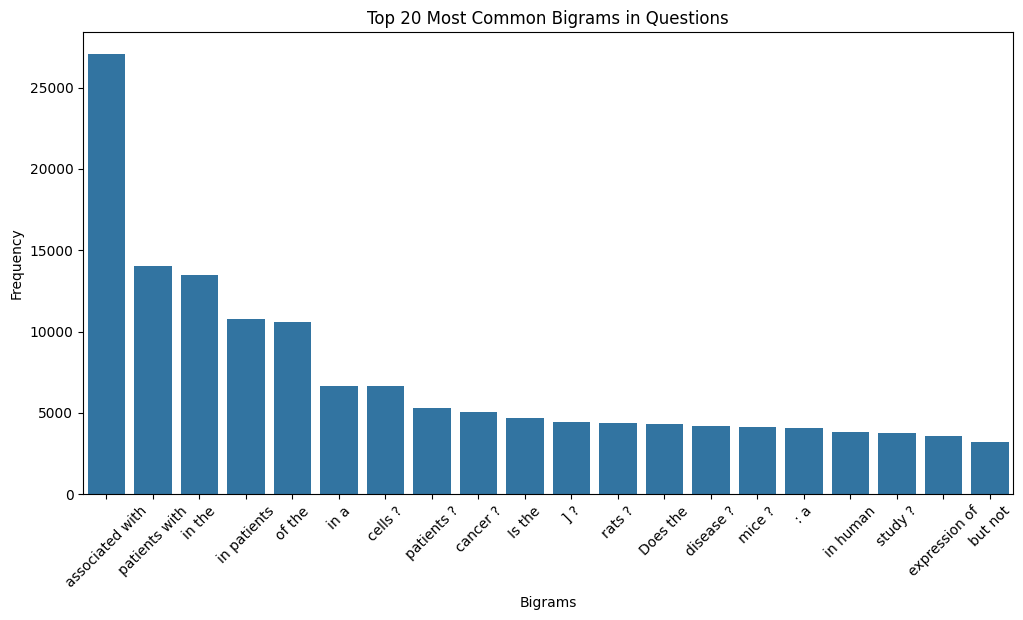

In [47]:
# Function to calculate n-grams frequency
def ngrams_frequency(texts, n):
    ngrams_list = []
    for text in texts:
        tokens = word_tokenize(text)
        ngrams_list.extend(ngrams(tokens, n))
    return Counter(ngrams_list)

# Calculate bigrams and trigrams frequency for 'question'
bigrams_freq = ngrams_frequency(questions, 2)

# Plot the top 20 most common bigrams in 'question'
bigrams_common = bigrams_freq.most_common(20)
bigrams, bigrams_counts = zip(*bigrams_common)
bigrams = [' '.join(bigram) for bigram in bigrams]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(bigrams), y=list(bigrams_counts))
plt.title('Top 20 Most Common Bigrams in Questions')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'in patients with'),
  Text(1, 0, 'in rats ?'),
  Text(2, 0, 'in mice ?'),
  Text(3, 0, 'associated with increased'),
  Text(4, 0, 'type 2 diabetes'),
  Text(5, 0, 'associated with the'),
  Text(6, 0, 'associated with a'),
  Text(7, 0, 'risk factor for'),
  Text(8, 0, 'in vitro ?'),
  Text(9, 0, 'of patients with'),
  Text(10, 0, 'cancer cells ?'),
  Text(11, 0, "'s disease ?"),
  Text(12, 0, 'the risk of'),
  Text(13, 0, 'the development of'),
  Text(14, 0, 'in vivo ?'),
  Text(15, 0, 'squamous cell carcinoma'),
  Text(16, 0, 'gene associated with'),
  Text(17, 0, 'coronary artery disease'),
  Text(18, 0, 'quality of life'),
  Text(19, 0, 'Does inhibition of')])

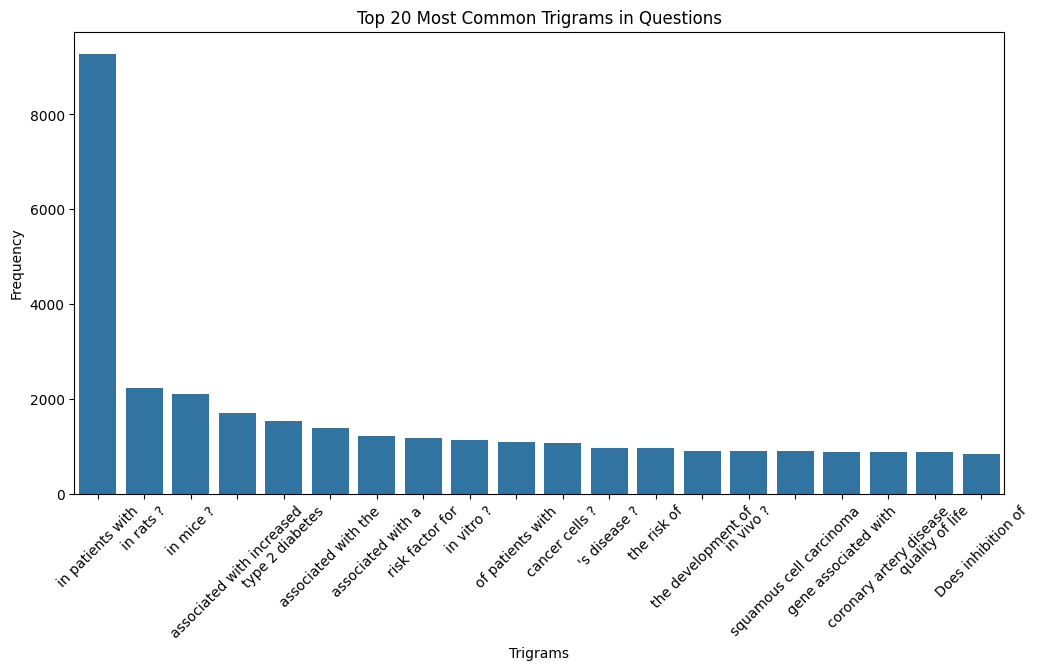

In [48]:
trigrams_freq = ngrams_frequency(questions, 3)

# Plot the top 20 most common trigrams in 'question'
trigrams_common = trigrams_freq.most_common(20)
trigrams, trigrams_counts = zip(*trigrams_common)
trigrams = [' '.join(trigram) for trigram in trigrams]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(trigrams), y=list(trigrams_counts))
plt.title('Top 20 Most Common Trigrams in Questions')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

## Next word prediction

In [49]:
from collections import defaultdict, Counter
import random

In [50]:
# Function to build a basic word-based model
def build_word_model(texts):
    # Initialize a defaultdict where each value is a Counter
    model = defaultdict(Counter)
    for text in texts:
        # Split the text into words
        words = text.split()
        # Iterate through the words, except the last one
        for i in range(len(words) - 1):
            # Increment the count of the next word in the Counter of the current word
            model[words[i]][words[i + 1]] += 1
    return model

In [51]:
texts = ["hello world", "hello there", "world of code", "hello world of code"]
model = build_word_model(texts)
model

defaultdict(collections.Counter,
            {'hello': Counter({'world': 2, 'there': 1}),
             'world': Counter({'of': 2}),
             'of': Counter({'code': 2})})

In [52]:
# Function to predict the next word based on the current word
def predict_next_word(current_word, model):
    # Check if the current word is in the model
    if current_word in model:
        # Get the Counter of next words
        next_words = model[current_word]
        # Calculate the total count of all next words
        total_count = sum(next_words.values())
        # Generate a random number between 1 and total_count
        rand_val = random.randint(1, total_count)
        cumulative_count = 0
        # Iterate through the next words and their counts
        for word, count in next_words.items():
            # Add the count to the cumulative count
            cumulative_count += count
            # If the cumulative count is greater than or equal to the random value, return the word
            if cumulative_count >= rand_val:
                return word
    # If the current word is not in the model, return None
    return None

In [63]:
# Example usage of the predict_next_word function
next_word = predict_next_word("hello", model)
print(next_word)  # Output could be "world" or "there"

there


In [64]:
# Function to generate a sequence of words
def generate_sequence(start_word, model, length):
    # Initialize the sequence with the starting word
    sequence = [start_word]
    # Set the current word to the starting word
    current_word = start_word

    # Loop to generate the sequence up to the desired length
    for _ in range(length - 1):
        # Predict the next word based on the current word
        next_word = predict_next_word(current_word, model)
        if next_word:
            # If a next word is found, add it to the sequence
            sequence.append(next_word)
            # Update the current word to the next word
            current_word = next_word
        else:
            # If no next word is found, stop the loop
            break

    # Join the list of words into a single string with spaces and return it
    return ' '.join(sequence)

In [66]:
# Example usage of the generate_sequence function
start_word = "hello"
sequence_length = 10
generated_sequence = generate_sequence(start_word, model, sequence_length)
print(generated_sequence)

hello world of code


In [67]:
word_model = build_word_model(questions)

In [69]:
# word_model.keys()   <- Ctrl+/

In [71]:
# Example usage: Predict the next word for a given word in a question
current_word = "What"
next_word = predict_next_word(current_word, word_model)
print(f"The predicted next word for '{current_word}' is '{next_word}'.")

The predicted next word for 'What' is 'do'.


In [73]:
# Example usage of the generate_sequence function
start_word = "What"
sequence_length = 10
generated_sequence = generate_sequence(start_word, word_model, sequence_length)
print(generated_sequence)

What do n't know-responses of bladder cancer?
